# Naive Bayes

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=BqUmKsfSWho

## Bayes Theorem

$ \large P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $

### Notes

The Naive Bayes classifier is based on the bias theorem which says that if we have two events A and B then the probability of event A given that B has already happened is equal to the probability of B given that A has happened times the probability of A divided by the probability of B.

## In our case

$ \large P(u|X) = \frac{P(X|y) \cdot P(y)}{P(X)} $

### Notes

We apply this to our case then our formula is the probability of our class Y given the feature vector X is equal to the probability X given Y times probability of Y divided by probability of X.

## with feature vector X

$ X = (x_{1}, x_{2}, x_{3}, ..., x_{n}) $

X is our feature vector which consists of several features.

## Assume that all features are mutually independent

$ \large P(y|X) = \Large \frac{P(x_{1}|y) \cdot P(x_{2}|y) \cdot ... \cdot P(x_{n}|y) \cdot P(y)}{P(X)} $

### Notes

It is called Naive Bayes because we make the assumption that all features are mutually independent. That means for example if we want to predict the probability that person is going out for a run given the feature that the sun is shining and also given the feature that the person is healthy. Both of these features might be independent but both contribute to this probability that the person goes out so in real life a lot of features are not mutually independent but this assumption works fine for a lot of problems. With this assumption we can split the probability of X given y and use the chain rule so we calculate the probability for each feature given y and multiply it with probability of y and divide by probability of X.

Probability of y given X is called the posterior probability, probability of X given y is called the class conditional probability and probability of y is called the prior probability of y and probability of X is called the prior probability of X.

We want to make a classification, so given this posterior probability we want to select the class with the highest probability.

## Select class with highest probability

$ \large y = argmax_{y} P(y|X) = argmax_{y} \Large \frac{P(x_{1}|y) \cdot P(x_{2}|y) \cdot ... \cdot P(x_{n}|y) \cdot P(y)}{P(X)} $

### Notes

We choose y which is the argmax of y of posterior probability of y given X. We can apply our formula and since we are only interested in y we don't need the probability of X, so we can cross it out and then our formula is like below.

$ \large y = argmax_{y} P(x_{1}|y) \cdot P(x_{2}|y) \cdot ... \cdot P(x_{n}|y) \cdot P(y) $

### Notes

y is argmax and then we multiplay each class conditional probability and then the prior probability. We also use a little trick ince all these values are our probabilities between 0 and 1 so if we multiply a lot of these values then we get very small numbers and we might run into overflow problems. In order to prevent this we apply the log function. We apply the log function for each of this probabilities like in equation below. 

$ \large y = argmax_{y} log(P(x_{1}|y)) + log(P(x_{2}|y)) + ... + log(P(x_{n}|y)) + log(P(y)) $

### Notes

With the rules for logarithms we can change the multiplication sign into a plus sign. Now we have formula that we need and we need to come up with this prior probability so the prior probability is just the frequency. What is class conditional probability of Xn given y and here we model this with a Gaussian distribution.

## Prior probability P(y): frequency

## Class conditional probability $P(x_{i}|y)$

$ \large P(x_{i}|y) = \frac{1}{\sqrt{2 \pi \sigma_{y}^{2}}} \cdot exp(\frac{(x_{i} - \mu_{y})^{2}}{2\sigma_{y}^{2}}) $

where:
$ \\ \sigma_{y}^{2} \: \text{is the variance of x associated with class y} $
$ \\ \mu_{y}^{2} \: \text{is the mean of the values in x associated with class y} $

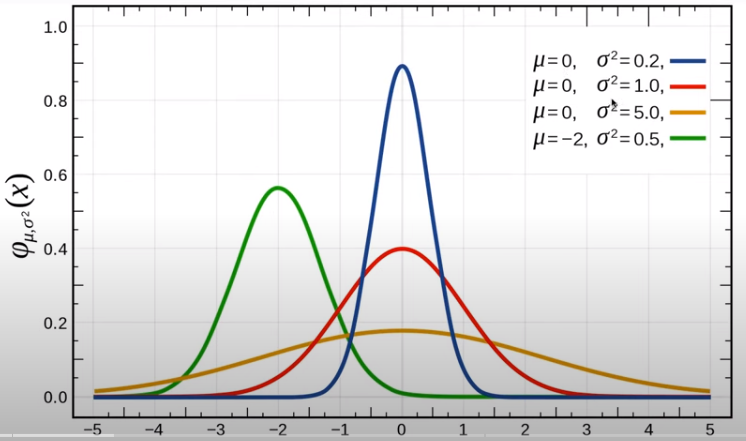

### Notes

Plot of the gaussian function for different means and variances.

In [2]:
import numpy as np

class NaiveBayes:
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        # init mean, var, priors
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)
        
        for c in self._classes:
            X_c = X[c == y]
            self._mean[c,:] = X_c.mean(axis=0)
            self._var[c,:] = X_c.var(axis=0)
            self._priors[c] = X_c.shape[0] / float(n_samples)
            
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return y_pred
    
    def _predict(self, x):
        posteriors = []
        
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            class_conditional = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)
            
        return self._classes[np.argmax(posteriors)]
            
    # Probability density function
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-(x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print("Naive Bayes classification accuracy:", accuracy(y_test, predictions))
    

Naive Bayes classification accuracy: 0.965
